In [1]:
import pandas as pd
import numpy as np


In [2]:
# we started with upmc mercy as our intitial data and then concating the rest3
main_df = pd.read_csv("/Users/karanraturi/Subjects/Analytical Practicum/PA/Cleaned/upmc_mercy_cleaned.csv",encoding='latin1',low_memory=False,index_col=0)
main_df.head()

,hospital_name,license_number,state,description,code|2,code|2|type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.0,478.50,1485.00
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.0,65.76,2036.33
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.6,317.26,984.60
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.6,36.12,984.60
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.6,317.26,984.60


In [3]:
main_df.rename(columns={'code|2': 'code','code|2|type': 'code_type'}, inplace=True)

main_df = pd.DataFrame(main_df)
main_df


,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.0,478.50,1485.00
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.0,65.76,2036.33
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.6,317.26,984.60
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.6,36.12,984.60
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.6,317.26,984.60
...,...,...,...,...,...,...,...,...,...,...,...,...
243684,UPMC Mercy,PA DOH 13610100,PA,LITHOLAPAXY: CRUSHING OR FRAGMENTATION OF CALC...,52317,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
243685,UPMC Mercy,PA DOH 13610100,PA,INSERTION OF PENILE PROSTHESIS; NON-INFLATABLE...,54400,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
243686,UPMC Mercy,PA DOH 13610100,PA,EXCISION OF HYDROCELE; UNILATERAL,55040,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
243687,UPMC Mercy,PA DOH 13610100,PA,RELEASE OF ENCIRCLING MATERIAL (POSTERIOR SEGM...,67115,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999


In [4]:
#Alleghany General Hospital to add it to the main df
side_df = pd.read_csv("/Users/karanraturi/Subjects/Analytical Practicum/PA/Cleaned/allegheny_cleaned.csv",encoding='latin1',low_memory=False,index_col=0)
side_df.rename(columns={'code|1': 'code','code|1|type': 'code_type'}, inplace=True)
side_df = pd.DataFrame(side_df)
side_df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,ALLEGHENY GENERAL HOSPITAL,530101,PA,HC CFX PHAL SHAFT W MANIP,26725,CPT,1123.0,Humana,Humana Commcercial,NaN,NaN,NaN
1,ALLEGHENY GENERAL HOSPITAL,530101,PA,PR RELEASE MUSCLES OF HAND,26593,CPT,5696.0,NaN,NaN,811.20,10314.64,9810.53
2,ALLEGHENY GENERAL HOSPITAL,530101,PA,PR RADICAL RESECTN STERNUM,21630,CPT,3727.0,NaN,NaN,896.60,108.33,967.28
3,ALLEGHENY GENERAL HOSPITAL,530101,PA,"PR INSERT CANNULA,ART-VEN REVISN",36815,CPT,380.0,NaN,NaN,191.52,10546.24,98.84
4,ALLEGHENY GENERAL HOSPITAL,530101,PA,"PR CRITICAL CARE, E/M 30-74 MINUTES",99291,CPT,NaN,University of Pittsburgh Medical Center,UPMC for You Medicaid CHC,166.79,1324.57,946.09
...,...,...,...,...,...,...,...,...,...,...,...,...
1612138,ALLEGHENY GENERAL HOSPITAL,530101,PA,"PR EXCISION BRACH CLFT CYST,SUPERFICIAL",42810,CPT,NaN,Univera,Univera Essential Plan,190.50,10259.75,9758.33
1612139,ALLEGHENY GENERAL HOSPITAL,530101,PA,PR SIGMOIDOSCOPY FLX W/RMVL FOREIGN BODY,45332,CPT,298.0,NaN,NaN,50.00,100.84,997.22
1612140,ALLEGHENY GENERAL HOSPITAL,530101,PA,PR EXCISE DIGITAL NEUROMA,64776,CPT,NaN,Univera,Univera Commercial,354.77,185.80,60.69
1612141,ALLEGHENY GENERAL HOSPITAL,530101,PA,"PR INCIS BILE DUCT/SPHINC,EXPL/RMV CALC",47425,CPT,NaN,Amerihealth,AmeriHealth Caritas D-SNP Medicare,1385.59,100.59,995.05


In [5]:
main_df= pd.concat([main_df,side_df]).reset_index(drop=True)


In [6]:
main_df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,478.50,1485.00
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,65.76,2036.33
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,36.12,984.60
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1855827,ALLEGHENY GENERAL HOSPITAL,530101,PA,"PR EXCISION BRACH CLFT CYST,SUPERFICIAL",42810,CPT,NaN,Univera,Univera Essential Plan,190.50,10259.75,9758.33
1855828,ALLEGHENY GENERAL HOSPITAL,530101,PA,PR SIGMOIDOSCOPY FLX W/RMVL FOREIGN BODY,45332,CPT,298.0,NaN,NaN,50.00,100.84,997.22
1855829,ALLEGHENY GENERAL HOSPITAL,530101,PA,PR EXCISE DIGITAL NEUROMA,64776,CPT,NaN,Univera,Univera Commercial,354.77,185.8,60.69
1855830,ALLEGHENY GENERAL HOSPITAL,530101,PA,"PR INCIS BILE DUCT/SPHINC,EXPL/RMV CALC",47425,CPT,NaN,Amerihealth,AmeriHealth Caritas D-SNP Medicare,1385.59,100.59,995.05


In [7]:
#UPMC Passavant to add it to the main df
side_df = pd.read_csv("/Users/karanraturi/Subjects/Analytical Practicum/PA/Cleaned/upmc_passavant_cleaned.csv",encoding='latin1',low_memory=False,index_col=0)
side_df.rename(columns={'code|2': 'code','code|2|type': 'code_type'}, inplace=True)
side_df = pd.DataFrame(side_df)
side_df.shape

(231387, 12)

In [8]:
main_df= pd.concat([main_df,side_df]).reset_index(drop=True)
main_df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.0,478.50,1485.00
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.0,65.76,2036.33
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.6,317.26,984.60
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.6,36.12,984.60
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.6,317.26,984.60
...,...,...,...,...,...,...,...,...,...,...,...,...
2087214,UPMC Passavant - McCandless,PA DOH 400401,PA,THROMBECTOMY OF ARTERIAL OR VENOUS GRAFT (OTHE...,35875,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
2087215,UPMC Passavant - McCandless,PA DOH 400401,PA,INSERTION OF NEW OR REPLACEMENT OF PERMANENT P...,33208,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
2087216,UPMC Passavant - McCandless,PA DOH 400401,PA,ARTHRODESIS; SUBTALAR,28725,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
2087217,UPMC Passavant - McCandless,PA DOH 400401,PA,CYSTOURETHROSCOPY (INCLUDING URETERAL CATHETER...,52320,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999


In [9]:
#UPMC Presbyterian to add it to the main df
side_df = pd.read_csv("/Users/karanraturi/Subjects/Analytical Practicum/PA/Cleaned/upmc_presbyterian_cleaned.csv",encoding='latin1',low_memory=False,index_col=0)
side_df.rename(columns={'code|2': 'code','code|2|type': 'code_type'}, inplace=True)
side_df = pd.DataFrame(side_df)
side_df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Presbyterian,PA DOH 163301,PA,FNA BX W/O IMG GDN EA ADDL,10004,CPT,400.0,Aetna,EBR ASO,140.0,70.40,340.00
1,UPMC Presbyterian,PA DOH 163301,PA,FNA BX W/O IMG GDN EA ADDL,10004,CPT,400.0,Aetna,EBR ASO,140.0,31.72,340.00
2,UPMC Presbyterian,PA DOH 163301,PA,EXTRACTION W/US GUI 1ST LES,10005,CPT,1610.0,Aetna,EBR ASO,563.5,283.36,1368.50
3,UPMC Presbyterian,PA DOH 163301,PA,EXTRACTION W/US GUI 1ST LES,10005,CPT,1610.0,Aetna,EBR ASO,563.5,65.76,1368.50
4,UPMC Presbyterian,PA DOH 163301,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1610.0,Aetna,EBR ASO,563.5,283.36,1368.50
...,...,...,...,...,...,...,...,...,...,...,...,...
318407,UPMC Presbyterian,PA DOH 163301,PA,ARTHROSCOPICALLY AIDED ANTERIOR CRUCIATE LIGAM...,29888,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
318408,UPMC Presbyterian,PA DOH 163301,PA,DIAGNOSTIC BONE MARROW; BIOPSY(IES),38221,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
318409,UPMC Presbyterian,PA DOH 163301,PA,AXILLARY LYMPHADENECTOMY; COMPLETE,38745,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
318410,UPMC Presbyterian,PA DOH 163301,PA,KERATOPLASTY (CORNEAL TRANSPLANT); ENDOTHELIAL,65756,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999


In [10]:
# Adding to the main df
main_df= pd.concat([main_df,side_df]).reset_index(drop=True)
main_df.shape

(2405631, 12)

In [11]:
#UPMC St Margaret to add it to the main df
side_df = pd.read_csv("/Users/karanraturi/Subjects/Analytical Practicum/PA/Cleaned/upmc_st_margaret_cleaned.csv",encoding='latin1',low_memory=False,index_col=0)
side_df.rename(columns={'code|2': 'code','code|2|type': 'code_type'}, inplace=True)
side_df = pd.DataFrame(side_df)
side_df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC St Margaret,195901,PA,FNA BX W/US GDN 1ST LES,10005,CPT,853.0,Aetna,EBR ASO,341.2,166.34,725.05
1,UPMC St Margaret,195901,PA,FNA BX W/US GDN 1ST LES,10005,CPT,853.0,Aetna,EBR ASO,341.2,65.76,2036.33
2,UPMC St Margaret,195901,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,853.0,Aetna,EBR ASO,341.2,166.34,725.05
3,UPMC St Margaret,195901,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,853.0,Aetna,EBR ASO,341.2,84.41,926.22
4,UPMC St Margaret,195901,PA,FNA BX W/CT GDN 1ST LES,10009,CPT,853.0,Aetna,EBR ASO,341.2,166.34,725.05
...,...,...,...,...,...,...,...,...,...,...,...,...
197367,UPMC St Margaret,195901,PA,MANIPULATION OF ANKLE UNDER GENERAL ANESTHESIA...,27860,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
197368,UPMC St Margaret,195901,PA,CLOSED TREATMENT OF DISTAL FIBULAR FRACTURE (L...,27788,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
197369,UPMC St Margaret,195901,PA,MANIPULATION OF KNEE JOINT UNDER GENERAL ANEST...,27570,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999
197370,UPMC St Margaret,195901,PA,BLADDER INSTILLATION OF ANTICARCINOGENIC AGENT...,51720,CPT,NaN,US Family Health Plan,Tricare Prime,NaN,"etc.""",999999999


In [12]:
# Adding to the main df
main_df= pd.concat([main_df,side_df]).reset_index(drop=True)
main_df.shape

(2603003, 12)

In [13]:
#UPMC St Margaret to add it to the main df
side_df = pd.read_csv("/Users/karanraturi/Subjects/Analytical Practicum/PA/Cleaned/west_penn_cleaned.csv",encoding='latin1',low_memory=False,index_col=0)
side_df.rename(columns={'code|1': 'code','code|1|type': 'code_type'}, inplace=True)
side_df = pd.DataFrame(side_df)
side_df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,WEST PENN HOSPITAL,234401,PA,HC IV INF DRUG ADD SEQ 16-60 MIN,96367,CPT,268.0,The Health Plan Of The Upper Ohio Valley,The Health Plan Of The Upper Ohio Valley HMO,NaN,NaN,NaN
1,WEST PENN HOSPITAL,234401,PA,"CHG RADIATION,MANGEMENT,5 TX'S",77427,CPT,543.0,NaN,NaN,206.43,112.47,234.00
2,WEST PENN HOSPITAL,234401,PA,PR REPLACE/IRRIGATE VENTRIC CATH,62225,CPT,NaN,Aetna,Aetna Commercial,458.15,10112.17,897.84
3,WEST PENN HOSPITAL,234401,PA,CHG IMMUNE COMPLEX ASSAY,86332,CPT,73.0,NaN,NaN,85.56,10.20,85.56
4,WEST PENN HOSPITAL,234401,PA,CHG LEUKOCYTE HISTAMINE RELEASE,86343,CPT,NaN,Highmark,Highmark My Direct Blue,13.20,10.09,21.48
...,...,...,...,...,...,...,...,...,...,...,...,...
1615266,WEST PENN HOSPITAL,234401,PA,"PR DESTR PENIS LESN,SIMPL,LASER SURG",54057,CPT,279.0,NaN,NaN,101.07,10.17,99.18
1615267,WEST PENN HOSPITAL,234401,PA,PR REVISION PROSTHETIC VAGINAL GRAFT LAPAROSCOPIC,57426,CPT,2500.0,NaN,NaN,938.86,101.15,993.38
1615268,WEST PENN HOSPITAL,234401,PA,"PR KNEE SCOPE,DRILL OSTE DISSEC+GRFT",29885,CPT,2167.0,NaN,NaN,7078.07,1070.88,996.31
1615269,WEST PENN HOSPITAL,234401,PA,HC INJ CNTRST EVAL ABSC/CYST,49424,CPT,1993.0,NaN,NaN,45.24,110.54,50.54


In [14]:
# Adding to the main df
main_df= pd.concat([main_df,side_df]).reset_index(drop=True)
main_df.shape

(4218274, 12)

In [15]:
#main_df.to_csv("Consoliated_cleaned.csv", index=False)
main_df["code_type"].value_counts()

CPT    4218274
Name: code_type, dtype: int64

In [16]:
main_df.drop_duplicates()

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,478.50,1485.00
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,65.76,2036.33
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,36.12,984.60
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
...,...,...,...,...,...,...,...,...,...,...,...,...
4218269,WEST PENN HOSPITAL,234401,PA,"PR DESTR PENIS LESN,SIMPL,LASER SURG",54057,CPT,279.0,NaN,NaN,101.07,10.17,99.18
4218270,WEST PENN HOSPITAL,234401,PA,PR REVISION PROSTHETIC VAGINAL GRAFT LAPAROSCOPIC,57426,CPT,2500.0,NaN,NaN,938.86,101.15,993.38
4218271,WEST PENN HOSPITAL,234401,PA,"PR KNEE SCOPE,DRILL OSTE DISSEC+GRFT",29885,CPT,2167.0,NaN,NaN,7078.07,1070.88,996.31
4218272,WEST PENN HOSPITAL,234401,PA,HC INJ CNTRST EVAL ABSC/CYST,49424,CPT,1993.0,NaN,NaN,45.24,110.54,50.54


In [17]:
main_df = main_df.dropna(how='any')
main_df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,478.50,1485.00
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,65.76,2036.33
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,36.12,984.60
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
...,...,...,...,...,...,...,...,...,...,...,...,...
2601827,UPMC St Margaret,195901,PA,ADMIN BSTR MODERNA 50MCG/0.5ML,0094A,CPT,40.0,UPMC Work Partners,Workers Comp,40.78,9.60,525.08
2601830,UPMC St Margaret,195901,PA,ADM ADDL PFIZER BIVALENT 12YR+,0124A,CPT,40.0,UPMC Work Partners,Workers Comp,38.59,9.60,525.08
2601831,UPMC St Margaret,195901,PA,ADM ADDL MODERNA BIVALENT 18Y+,0134A,CPT,40.0,UPMC Work Partners,Workers Comp,38.59,9.60,525.08
2601837,UPMC St Margaret,195901,PA,SARS-COV2/FLU/RSV,0241U,CPT,275.0,UPMC Work Partners,Workers Comp,138.61,66.00,1130.36


In [18]:
des = main_df['description'].unique()

In [19]:
des = pd.array(des)

In [20]:
len(des)

10815

In [21]:
code_dict = {val: i for i, val in enumerate(des)}
code_dict


{'FNA BX W/US GDN 1ST LES': 0,
 'FNA BX W/US GDN EA ADDL': 1,
 'FNA BX W/FLUOR GDN 1ST LES': 2,
 'FNA BX W/CT GDN 1ST LES': 3,
 'FNA BX W/CT GDN EA ADDL': 4,
 'FNA BX W/MR GDN 1ST LES': 5,
 'FNA BIOPSY W/O IMA GDE 1ST LES': 6,
 'IMG GUID DRN SOFT TIS CTH PERC': 7,
 'ID SIMPLE ABSCESS': 8,
 'ID COMPL ABSCESS': 9,
 'ID PILONIDAL CYST': 10,
 'SUBCUT FB REMOVAL SIMPLE': 11,
 'SUBCUT FB REMOVAL COMPL': 12,
 'I & D HEMATOMA SEROMA OR FLUID': 13,
 'PUNC ASP ABS HEMATOM BULLA CYS': 14,
 'ASPIRATION HEMATOMA': 15,
 'DRAINAGE FLUID COLLECTION': 16,
 'I & D COMPLEX POST-OP INFECT': 17,
 'EXTENS DEBRID ECZE SKIN': 18,
 'DEBRIDE & REM FOREIGN MATTER': 19,
 'DEBRID SKIN AND SQ TISSUE': 20,
 'DEBRIDE SKIN SUBCU TISSU & MUS': 21,
 'DEBRIDE SKIN SUBQ MUS & BONE': 22,
 "DEBRID SQ TIS EA ADD'L 20 CM": 23,
 "DEBRID MUSCLE EA ADD'L 20 CM": 24,
 "DEBRID BONE EA ADD'L 20 CM": 25,
 'PAR/CUT BEN HYPERK/SINGLE LES': 26,
 'PAR/CUT HYPERK LESION SINGLE': 27,
 'PAR/CUT HYPERK LESION 2 TO 4': 28,
 'PAR/CUT HYPERK L

In [22]:
df = main_df
df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,478.50,1485.00
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,65.76,2036.33
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,36.12,984.60
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60
...,...,...,...,...,...,...,...,...,...,...,...,...
2601827,UPMC St Margaret,195901,PA,ADMIN BSTR MODERNA 50MCG/0.5ML,0094A,CPT,40.0,UPMC Work Partners,Workers Comp,40.78,9.60,525.08
2601830,UPMC St Margaret,195901,PA,ADM ADDL PFIZER BIVALENT 12YR+,0124A,CPT,40.0,UPMC Work Partners,Workers Comp,38.59,9.60,525.08
2601831,UPMC St Margaret,195901,PA,ADM ADDL MODERNA BIVALENT 18Y+,0134A,CPT,40.0,UPMC Work Partners,Workers Comp,38.59,9.60,525.08
2601837,UPMC St Margaret,195901,PA,SARS-COV2/FLU/RSV,0241U,CPT,275.0,UPMC Work Partners,Workers Comp,138.61,66.00,1130.36


In [23]:
df["Key"] = df['description'].map(code_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964918 entries, 0 to 2601838
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   hospital_name                      964918 non-null  object 
 1   license_number                     964918 non-null  object 
 2   state                              964918 non-null  object 
 3   description                        964918 non-null  object 
 4   code                               964918 non-null  object 
 5   code_type                          964918 non-null  object 
 6   standard_charge|gross              964918 non-null  float64
 7   payer_name                         964918 non-null  object 
 8   plan_name                          964918 non-null  object 
 9   standard_charge|negotiated_dollar  964918 non-null  float64
 10  standard_charge|min                964918 non-null  object 
 11  standard_charge|max                964

In [24]:
df['standard_charge|min'] = pd.to_numeric(df['standard_charge|min'], errors='coerce')
df = df.dropna(subset=['standard_charge|min'])

In [25]:
df['standard_charge|max'] = pd.to_numeric(df['standard_charge|max'], errors='coerce')
df = df.dropna(subset=['standard_charge|max'])
df.info()

/var/folders/v9/86zm83nj3012jnyj9hjr0lmw0000gn/T/ipykernel_69184/753322049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['standard_charge|max'] = pd.to_numeric(df['standard_charge|max'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 964915 entries, 0 to 2601838
Data columns (total 13 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   hospital_name                      964915 non-null  object 
 1   license_number                     964915 non-null  object 
 2   state                              964915 non-null  object 
 3   description                        964915 non-null  object 
 4   code                               964915 non-null  object 
 5   code_type                          964915 non-null  object 
 6   standard_charge|gross              964915 non-null  float64
 7   payer_name                         964915 non-null  object 
 8   plan_name                          964915 non-null  object 
 9   standard_charge|negotiated_dollar  964915 non-null  float64
 10  standard_charge|min                964915 non-null  float64
 11  standard_charge|max                964

In [26]:
df

,hospital_name,license_number,state,description,code,code_type,standard_charge|gross,payer_name,plan_name,standard_charge|negotiated_dollar,standard_charge|min,standard_charge|max,Key
0,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,478.50,1485.00,0
1,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN 1ST LES,10005,CPT,1650.0,Aetna,EBR ASO,660.00,65.76,2036.33,0
2,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60,1
3,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/US GDN EA ADDL,10006,CPT,1094.0,Aetna,EBR ASO,437.60,36.12,984.60,1
4,UPMC Mercy,PA DOH 13610100,PA,FNA BX W/FLUOR GDN 1ST LES,10007,CPT,1094.0,Aetna,EBR ASO,437.60,317.26,984.60,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601827,UPMC St Margaret,195901,PA,ADMIN BSTR MODERNA 50MCG/0.5ML,0094A,CPT,40.0,UPMC Work Partners,Workers Comp,40.78,9.60,525.08,4235
2601830,UPMC St Margaret,195901,PA,ADM ADDL PFIZER BIVALENT 12YR+,0124A,CPT,40.0,UPMC Work Partners,Workers Comp,38.59,9.60,525.08,4238
2601831,UPMC St Margaret,195901,PA,ADM ADDL MODERNA BIVALENT 18Y+,0134A,CPT,40.0,UPMC Work Partners,Workers Comp,38.59,9.60,525.08,4239
2601837,UPMC St Margaret,195901,PA,SARS-COV2/FLU/RSV,0241U,CPT,275.0,UPMC Work Partners,Workers Comp,138.61,66.00,1130.36,4252


<Axes: >

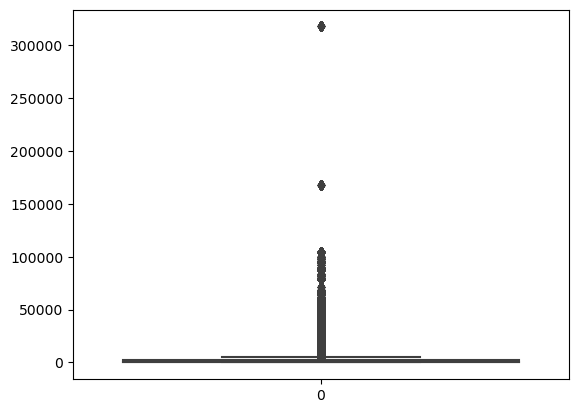

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df['standard_charge|gross'])

Text(0.5, 1.0, 'Distribution of Gross Charges')

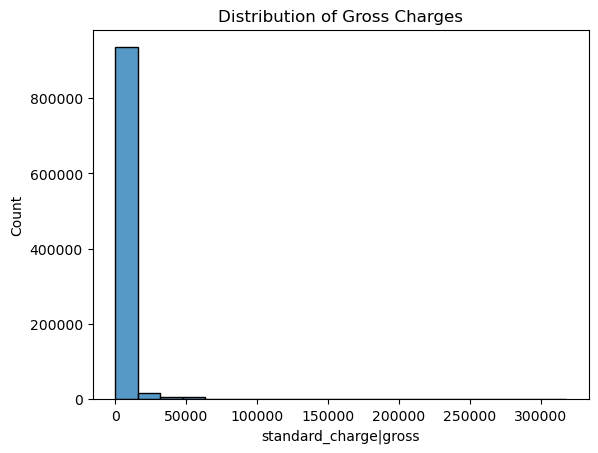

In [28]:
sns.histplot(df['standard_charge|gross'], bins=20)
plt.title("Distribution of Gross Charges")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Health Partners Plans (Jefferson Health Plan)'),
  Text(1, 0, 'United Healthcare Community Plan for Families'),
  Text(2, 0, 'UPMC Work Partners'),
  Text(3, 0, 'Highmark Wholecare (prev Gateway)'),
  Text(4, 0, 'AmeriHealth Caritas'),
  Text(5, 0, 'UPMC Health Plan'),
  Text(6, 0, 'PA Health & Wellness'),
  Text(7, 0, 'Aetna of PA'),
  Text(8, 0, 'Bravo'),
  Text(9, 0, 'Geisinger'),
  Text(10, 0, 'United Healthcare'),
  Text(11, 0, 'Aetna'),
  Text(12, 0, 'Highmark BCBS of PA'),
  Text(13, 0, 'Cigna'),
  Text(14, 0, 'Health Plan of Upper Ohio Valley'),
  Text(15, 0, 'Premier Comp Solutions'),
  Text(16, 0, 'American Healthcare Group'),
  Text(17, 0, 'National Provider Network'),
  Text(18, 0, 'Coventry/First Health'),
  Text(19, 0, 'InterGroup'),
  Text(20, 0, 'Private Health Care Systems'),
  Text(21, 0, 'Multiplan'),
  Text(22, 0, 'SelectCar

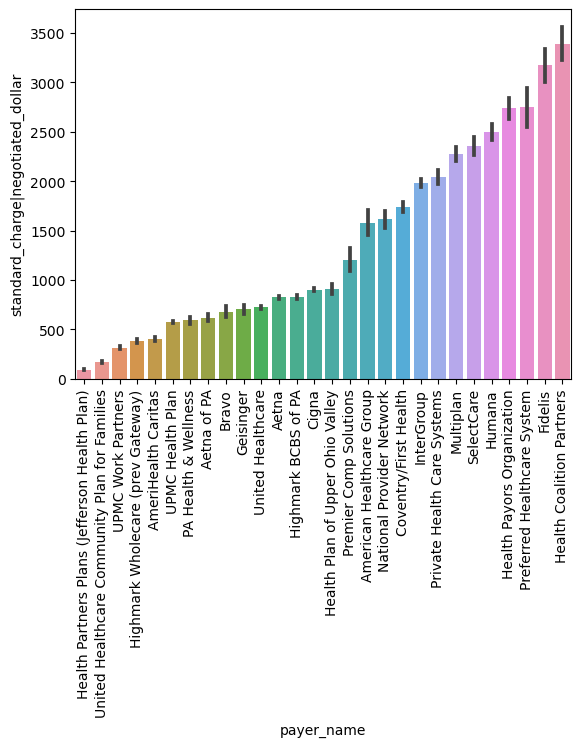

In [40]:
# Group by payer_name and calculate average negotiated charge
payer_means = df.groupby('payer_name')['standard_charge|negotiated_dollar'].mean().sort_values()
sns.barplot(data=df, x='payer_name', y='standard_charge|negotiated_dollar',order=payer_means.index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Aetna'),
  Text(1, 0, 'AmeriHealth Caritas'),
  Text(2, 0, 'Bravo'),
  Text(3, 0, 'Cigna'),
  Text(4, 0, 'Coventry/First Health'),
  Text(5, 0, 'Geisinger'),
  Text(6, 0, 'Health Partners Plans (Jefferson Health Plan)'),
  Text(7, 0, 'Health Payors Organization'),
  Text(8, 0, 'Highmark BCBS of PA'),
  Text(9, 0, 'Highmark Wholecare (prev Gateway)'),
  Text(10, 0, 'InterGroup'),
  Text(11, 0, 'Multiplan'),
  Text(12, 0, 'National Provider Network'),
  Text(13, 0, 'PA Health & Wellness'),
  Text(14, 0, 'Private Health Care Systems'),
  Text(15, 0, 'Premier Comp Solutions'),
  Text(16, 0, 'United Healthcare'),
  Text(17, 0, 'American Healthcare Group'),
  Text(18, 0, 'Aetna of PA'),
  Text(19, 0, 'UPMC Health Plan'),
  Text(20, 0, 'UPMC Work Partners'),
  Text(21, 0, 'Health Plan of Upper Ohio Valley'),
  Text(22, 0, 'Humana'),
  Text(23, 0, 'Uni

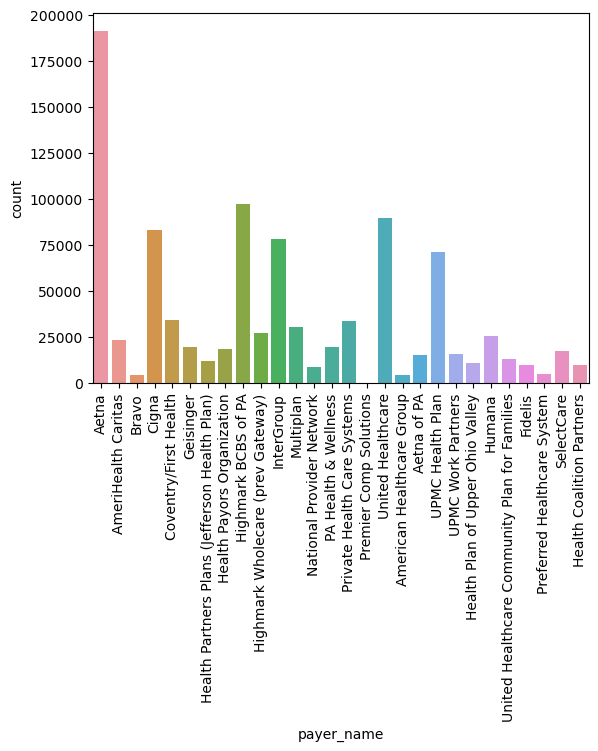

In [36]:
sns.countplot(data=df, x="payer_name")
plt.xticks(rotation=90)

In [ ]:
charges = df[['standard_charge|gross', 'standard_charge|negotiated_dollar', "standard_charge|min", 'standard_charge|max']]
sns.heatmap(charges.corr(), annot=True)

In [ ]:
# Plot range
df_sample = df.head(100)  # Too many codes otherwise!
plt.errorbar(df_sample['code'], df_sample['standard_charges|min'], yerr=(df_sample['standard_charges|max'] - df_sample['standard_charges|min']), fmt='o')
plt.xticks(rotation=90)